## Introduction

This notebook is a code recording to predict the sleep stage based on the data from Julian. 


### 08.11.2024




#### Import MATLAB data

The original data from UZH is in MATLAB format. Use the script `import_sleepSageData.py` provided by Julian to convert the data into a pandas dataframe.


In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import os


In [ ]:
os.getcwd()

In [2]:
# Data folder

data_folder = "/home/gs/code/tinysleepnet-pytorch-gs/data/EEG-SleepStaging_hdEEG"

# Load the .mat file
data = loadmat(data_folder + '/Filtered_EPISL_01_W1_EEG_FiltDwn_05to30Hz.mat')



### Load the data. 

The data is in dictionary format with the following keys:
- `__header__` 
- `__version__`
- `__globals__`
- `EEG_filtered`


In [3]:
# EEG data from the .mat file, shape = (129, 3605508)
eeg = data["EEG_filtered"]["EEG"][0, 0]

# Channel location
channel_location = data["EEG_filtered"]["chanlocs"][0, 0]

# Indices of clean epochs. Adjusted to 0-based indexing.
visgood = data["EEG_filtered"]["visgood"][0, 0] - 1

# Expert labeled sleep stages
visnum = data["EEG_filtered"]["visnum"][0, 0]

visgood = visgood.astype(int)
visnum = visnum.astype(int)


In [4]:
# FpZ was the 15th channel in the original data
eeg_fpz = eeg[14, :]

In [13]:
eeg_cz = eeg[128, :]
eeg_cz

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

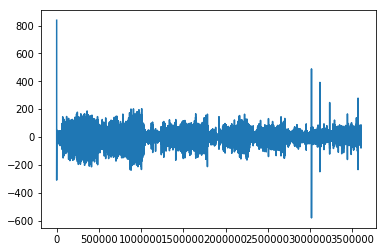

In [14]:
import matplotlib.pyplot as plt

plt.plot(eeg_fpz)

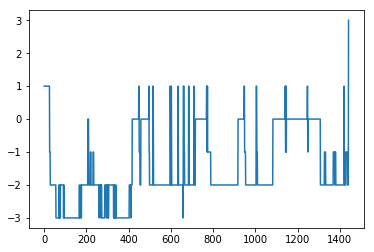

In [48]:
# Plot of sleep stages
plt.plot(visnum.T)


## Extract good epochs

In [5]:
# EEG signal frequency is 125 Hz
SIGNAL_FREQ = 125

# Each epoch is 20 seconds long
EPOCH_DURATION = 20


In [6]:
eeg_fpz_good = np.empty((0, SIGNAL_FREQ * EPOCH_DURATION))
y_good = np.zeros(len(visgood[0]))

for i, epoch in np.ndenumerate(visgood[0]):

    print(i, epoch)

    start = int((epoch) * SIGNAL_FREQ * EPOCH_DURATION)
    end = int((epoch+1) * SIGNAL_FREQ * EPOCH_DURATION)
    eeg_fpz_good = np.concatenate((eeg_fpz_good, eeg_fpz[np.newaxis, start:end]), axis=0)

    y_good[i] = visnum[0, int(epoch)]


(0,) 2
(1,) 4
(2,) 5
(3,) 6
(4,) 7
(5,) 8
(6,) 10
(7,) 12
(8,) 18
(9,) 19
(10,) 20
(11,) 21
(12,) 22
(13,) 25
(14,) 26
(15,) 27
(16,) 28
(17,) 29
(18,) 30
(19,) 31
(20,) 32
(21,) 33
(22,) 34
(23,) 35
(24,) 36
(25,) 37
(26,) 38
(27,) 39
(28,) 40
(29,) 41
(30,) 42
(31,) 43
(32,) 44
(33,) 45
(34,) 46
(35,) 47
(36,) 48
(37,) 49
(38,) 50
(39,) 51
(40,) 52
(41,) 53
(42,) 54
(43,) 55
(44,) 56
(45,) 57
(46,) 58
(47,) 59
(48,) 60
(49,) 61
(50,) 62
(51,) 63
(52,) 64
(53,) 65
(54,) 66
(55,) 67
(56,) 68
(57,) 69
(58,) 70
(59,) 71
(60,) 72
(61,) 73
(62,) 74
(63,) 76
(64,) 77
(65,) 78
(66,) 79
(67,) 80
(68,) 81
(69,) 82
(70,) 83
(71,) 84
(72,) 85
(73,) 86
(74,) 87
(75,) 88
(76,) 89
(77,) 90
(78,) 91
(79,) 92
(80,) 93
(81,) 94
(82,) 95
(83,) 96
(84,) 97
(85,) 98
(86,) 99
(87,) 100
(88,) 101
(89,) 102
(90,) 103
(91,) 104
(92,) 105
(93,) 106
(94,) 107
(95,) 108
(96,) 109
(97,) 110
(98,) 111
(99,) 112
(100,) 113
(101,) 114
(102,) 115
(103,) 116
(104,) 117
(105,) 118
(106,) 119
(107,) 120
(108,) 121
(109

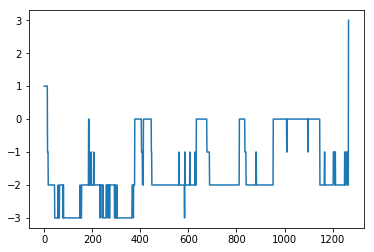

In [19]:
plt.plot(y_good)

In [7]:
# Adjust labels to Tinysleepnet format
# 0: Wake, 1: N1, 2: N2, 3: N3, 4: REM

y_good = np.where(y_good == 1, 5, y_good)
y_good = np.where(y_good == 0, 9, y_good)
y_good = np.where(y_good == -1, 6, y_good)
y_good = np.where(y_good == -2, 7, y_good)
y_good = np.where(y_good == -3, 8, y_good)
y_good = y_good.astype(np.int32)
y_good = y_good - 5
y_good

array([ 0,  0,  0, ...,  2,  2, -2], dtype=int32)

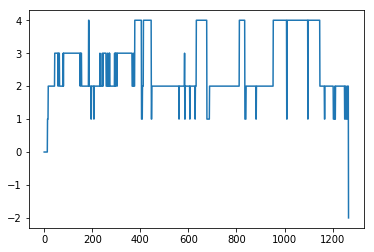

In [21]:
plt.plot(y_good)

In [18]:
[
    "x",
    "y",
    "fs",
    "ch_label",
    "start_datetime",
    "file_duration",
    "epoch_duration",
    "n_all_epochs",
    "n_epochs",
]

x = eeg_fpz_good
y = y_good
fs = SIGNAL_FREQ
ch_label = "Fpz"
start_datetime = "2021-01-01 00:00:00"
file_duration = eeg_fpz_good.shape[0] * EPOCH_DURATION
epoch_duration = eeg_fpz.shape[0] / SIGNAL_FREQ
n_all_epochs = visnum.shape[1]
n_epochs = eeg_fpz_good.shape[0]


```python
x
(841, 3000)
[[  8.111356   17.488646   21.239561  ... -10.361905  -11.112088
   -2.1098902]
 [-10.736997  -11.393407   -4.4542127 ...  58.84249    48.339928
   53.684982 ]
 [ 61.37436    38.68132    49.558975  ...  33.617584   34.367767
   31.835897 ]
 [ 27.803663   24.14652    24.14652   ...  26.303297   42.61978
   56.967033 ]
 [ 69.15751    74.59634    79.00366   ...  11.956044   25.365568
   42.994873 ]]
y
(841,)
[0 0 0 0 0]
fs 100.0
ch_label EEG Fpz-Cz
file_duration 79500.0
epoch_duration 30.0
n_all_epochs 2650
n_epochs 841
```

## Extract UZH epochs and resegment them to 30 seconds and 100 Hz per epoch

In [8]:
# EEG signal frequency is 125 Hz
SIGNAL_FREQ = 125

# Each epoch is 20 seconds long
EPOCH_DURATION = 20


In [13]:
eeg_fpz_good = np.empty((0, 30 * SIGNAL_FREQ))
y_good = np.empty((0))
epoch_good = np.empty((0))

for i, epoch in np.ndenumerate(visgood[0]):

    print(i, epoch)

    next_epoch = epoch + 1

    if epoch in visgood[0] and next_epoch in visgood[0] and visnum[0, epoch] == visnum[0, next_epoch]:
        
        start = epoch * EPOCH_DURATION * SIGNAL_FREQ
        end = start + 30 * SIGNAL_FREQ
        eeg_fpz_good = np.concatenate((eeg_fpz_good, eeg_fpz[np.newaxis, start:end]), axis=0)
        y_good = np.concatenate((y_good, visnum[0, epoch][np.newaxis]), axis=0)
        epoch_good = np.concatenate((epoch_good, epoch[np.newaxis]), axis=0)





(0,) 2
(1,) 4
(2,) 5
(3,) 6
(4,) 7
(5,) 8
(6,) 10
(7,) 12
(8,) 18
(9,) 19
(10,) 20
(11,) 21
(12,) 22
(13,) 25
(14,) 26
(15,) 27
(16,) 28
(17,) 29
(18,) 30
(19,) 31
(20,) 32
(21,) 33
(22,) 34
(23,) 35
(24,) 36
(25,) 37
(26,) 38
(27,) 39
(28,) 40
(29,) 41
(30,) 42
(31,) 43
(32,) 44
(33,) 45
(34,) 46
(35,) 47
(36,) 48
(37,) 49
(38,) 50
(39,) 51
(40,) 52
(41,) 53
(42,) 54
(43,) 55
(44,) 56
(45,) 57
(46,) 58
(47,) 59
(48,) 60
(49,) 61
(50,) 62
(51,) 63
(52,) 64
(53,) 65
(54,) 66
(55,) 67
(56,) 68
(57,) 69
(58,) 70
(59,) 71
(60,) 72
(61,) 73
(62,) 74
(63,) 76
(64,) 77
(65,) 78
(66,) 79
(67,) 80
(68,) 81
(69,) 82
(70,) 83
(71,) 84
(72,) 85
(73,) 86
(74,) 87
(75,) 88
(76,) 89
(77,) 90
(78,) 91
(79,) 92
(80,) 93
(81,) 94
(82,) 95
(83,) 96
(84,) 97
(85,) 98
(86,) 99
(87,) 100
(88,) 101
(89,) 102
(90,) 103
(91,) 104
(92,) 105
(93,) 106
(94,) 107
(95,) 108
(96,) 109
(97,) 110
(98,) 111
(99,) 112
(100,) 113
(101,) 114
(102,) 115
(103,) 116
(104,) 117
(105,) 118
(106,) 119
(107,) 120
(108,) 121
(109

In [16]:
epoch_good, visnum[0]

(array([   4.,    5.,    6., ..., 1437., 1438., 1439.]),
 array([ 1,  1,  1, ..., -2, -2,  3]))

In [15]:
eeg_fpz_good.shape

(1114, 3750)

In [19]:
np.savez("Filtered_EPISL_01_W1_EEG_FiltDwn_05to30Hz", x=x, y=y, fs=fs, ch_label=ch_label, start_datetime=start_datetime, file_duration=file_duration, epoch_duration=epoch_duration, n_all_epochs=n_all_epochs, n_epochs=n_epochs)

In [ ]:
np.savez(data_folder + "Filtered_EPISL_01_W1_EEG_FiltDwn_05to30Hz", x=x, y=y, fs=fs, ch_label=ch_label, start_datetime=start_datetime, file_duration=file_duration, epoch_duration=epoch_duration, n_all_epochs=n_all_epochs, n_epochs=n_epochs)



In [2]:
import os

data_folder = "/home/gs/code/tinysleepnet-pytorch-gs/data/EEG-SleepStaging_hdEEG"



### Use `readin_mat_file.py` to preprocess the mat data. 

mat file:  Filtered_EPISL_03_W1_EEG_FiltDwn_05to30Hz.mat
(0,) 1
(1,) 2
(2,) 4
(3,) 5
(4,) 7
(5,) 8
(6,) 9
(7,) 10
(8,) 11
(9,) 13
(10,) 14
(11,) 15
(12,) 16
(13,) 17
(14,) 19
(15,) 20
(16,) 22
(17,) 23
(18,) 24
(19,) 25
(20,) 26
(21,) 28
(22,) 29
(23,) 30
(24,) 31
(25,) 32
(26,) 33
(27,) 34
(28,) 35
(29,) 36
(30,) 37
(31,) 38
(32,) 39
(33,) 40
(34,) 41
(35,) 42
(36,) 43
(37,) 44
(38,) 45
(39,) 46
(40,) 48
(41,) 49
(42,) 50
(43,) 51
(44,) 52
(45,) 53
(46,) 54
(47,) 55
(48,) 56
(49,) 58
(50,) 59
(51,) 60
(52,) 61
(53,) 62
(54,) 63
(55,) 64
(56,) 65
(57,) 66
(58,) 67
(59,) 68
(60,) 69
(61,) 71
(62,) 72
(63,) 73
(64,) 74
(65,) 75
(66,) 76
(67,) 77
(68,) 78
(69,) 79
(70,) 80
(71,) 81
(72,) 82
(73,) 84
(74,) 85
(75,) 86
(76,) 87
(77,) 88
(78,) 89
(79,) 90
(80,) 91
(81,) 92
(82,) 93
(83,) 94
(84,) 95
(85,) 96
(86,) 97
(87,) 98
(88,) 99
(89,) 100
(90,) 101
(91,) 102
(92,) 103
(93,) 104
(94,) 105
(95,) 106
(96,) 107
(97,) 108
(98,) 109
(99,) 110
(100,) 111
(101,) 112
(102,) 113
(103,) 114
(104,

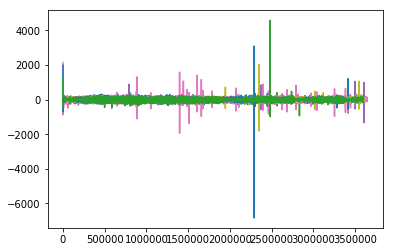

In [ ]:


data_folder = "/home/gs/code/tinysleepnet-pytorch-gs/data/EEG-SleepStaging_hdEEG"

from readin_mat_file import readin_mat_file


readin_mat_file(data_folder)